In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W6495_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])
df = df.set_index(['datetime'])

df1h =  df.resample('H').mean()
df3h = df.resample('3H').mean()
df6h = df.resample('6H').mean()
df12h = df.resample('12H').mean()
df1d = df.resample('1D').mean()
df1w = df.resample('1W').mean()
df1mon = df.resample('1M').mean()

In [25]:
df.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,DR,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 12:00:00,1286.617554,0.0,1490.328979,0.0,71.181564,0.0,921.323975,0.552979,255.050001,44.0,...,1014.933329,444.500000,0.0,1.276400,12.450000,13.983333,7.000000,68.833333,29966.666667,10.833333
2017-04-24 13:00:00,1286.711182,0.0,1490.328979,0.0,109.425499,0.0,921.323975,0.000000,252.866666,58.0,...,1014.183339,410.333333,0.0,0.513033,12.766667,13.850000,6.533333,65.333333,36050.000000,32.666667
2017-04-24 14:00:00,1286.792236,0.0,1490.328979,0.0,76.805016,0.0,921.323975,0.000000,259.849996,0.0,...,1013.616669,449.166667,0.0,1.507850,12.800000,14.266667,6.483333,65.000000,40366.666667,5.500000
2017-04-24 15:00:00,1286.906006,0.0,1490.328979,0.0,160.719452,0.0,921.323975,0.000000,263.516665,0.0,...,1012.966665,356.000000,0.0,0.000000,12.400000,13.633334,6.600000,67.333333,34000.000000,2.000000
2017-04-24 16:00:00,1287.060303,0.0,1490.328979,0.0,129.262039,0.0,921.323975,0.000000,252.883331,0.0,...,1012.083344,254.666667,0.0,0.130250,12.150000,13.033333,6.416667,67.333333,35150.000000,2.000000


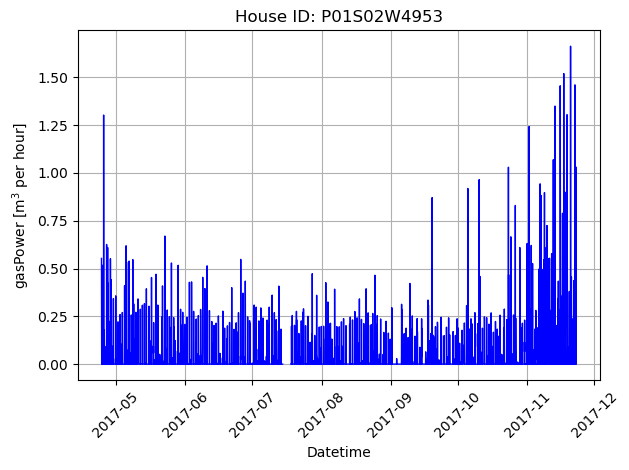

In [26]:
plt.title('House ID: P01S02W4953')

plt.plot(df.index[:], df['gasPower'][:], '-', color='b', linewidth=1)
plt.xlabel('Datetime')
plt.ylabel('gasPower [m$^3$ per hour]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig('sample1.png', dpi=500)

plt.show()

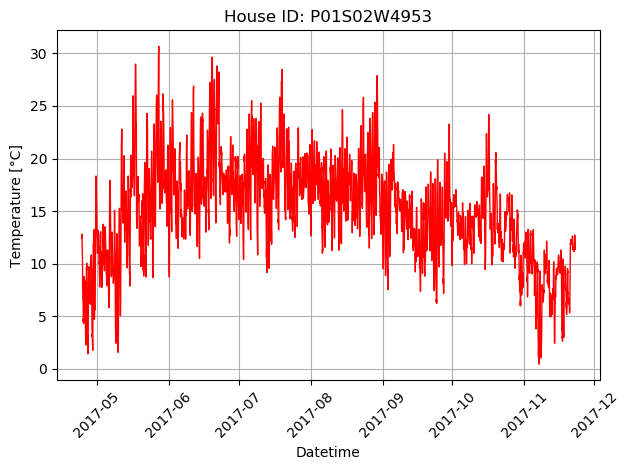

In [27]:
plt.title('House ID: P01S02W4953')

plt.plot(df.index[:], df['T'][:], '-', color='r', linewidth=1)
plt.xlabel('Datetime')
plt.ylabel('Temperature [°C]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
# plt.savefig('sample2.png', dpi=1000)

plt.show()

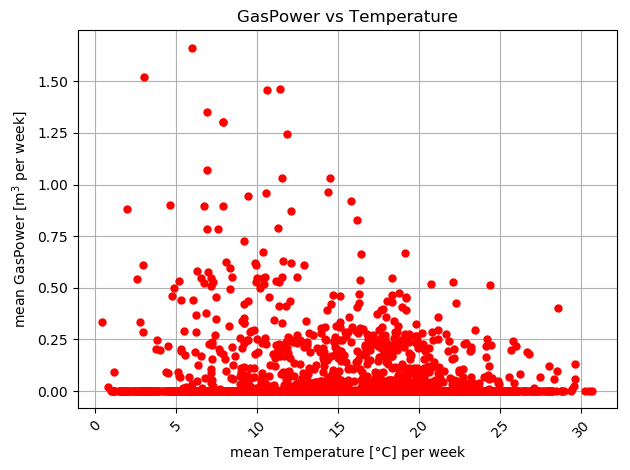

In [29]:
plt.title('GasPower vs Temperature')

plt.plot(df['T'][:],df['gasPower'][:], '.', color='r', ms=10)
plt.ylabel('mean GasPower [m$^3$ per week]')
plt.xlabel('mean Temperature [°C] per week')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig('sample2.png', dpi=1000)

plt.show()

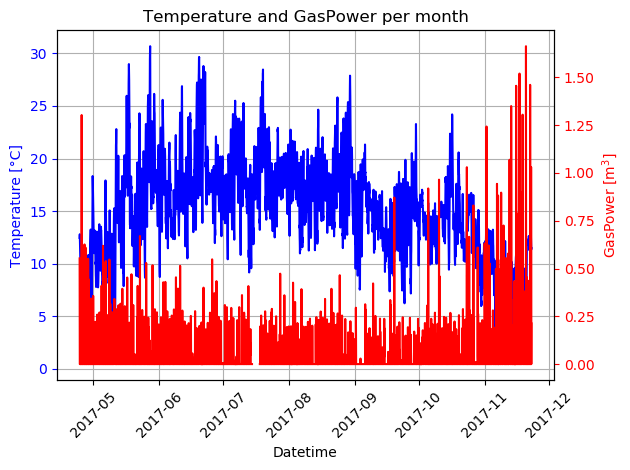

In [30]:
fig, ax1 = plt.subplots()
ax1.plot(df.index[:], df['T'], 'b-')
plt.title('Temperature and GasPower per month')
ax1.set_xlabel('Datetime')
plt.xticks(rotation=45)
#Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Temperature [°C]', color='b')
ax1.tick_params('y', colors='b')
plt.grid()
fig.tight_layout()

ax2 = ax1.twinx()
ax2.plot(df.index[:], df['gasPower'], 'r-')
ax2.set_ylabel('GasPower [m$^3$]', color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()

plt.savefig('sample1mon.png', dpi=1000)
plt.show()